In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print(data.shape)

(299, 13)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


Total No. Of Living Cases : 203
Total No. Of Died Cases : 96


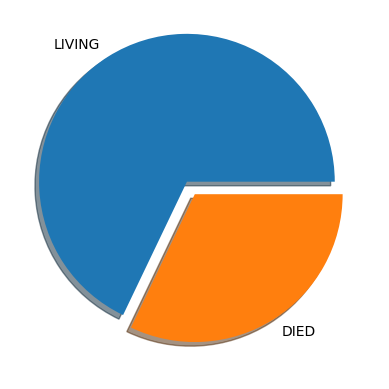

In [ ]:
len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_death = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING', 'DIED']
print("Total No. Of Living Cases :", len_live)
print("Total No. Of Died Cases :", len_death)

plt.pie(arr, labels=labels, explode = [0.1,0.0], shadow=True)
plt.show()

/tmp/ipython-input-21-1827359306.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


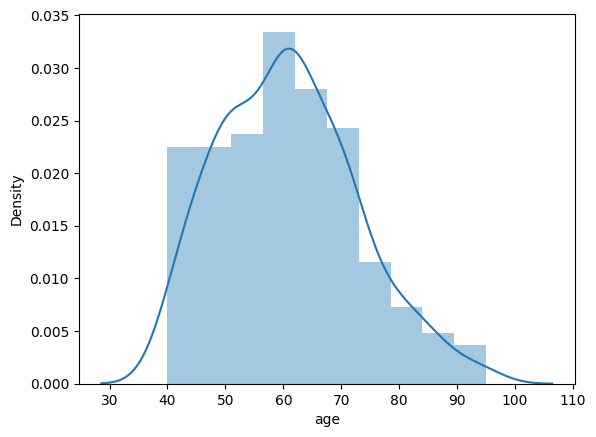

In [ ]:
sns.distplot(data.age)
plt.show()

Total No. Of Living Cases : 167
Total No. Of Died Cases : 85


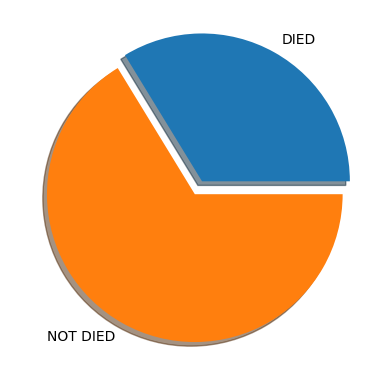

In [ ]:
age_above_50_not_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = [len_died, len_not_died]
labels = ['DIED', 'NOT DIED']

print("Total No. Of Living Cases :", len_not_died)
print("Total No. Of Died Cases :", len_died)

plt.pie(arr1, labels=labels, explode = [0.1,0.0], shadow=True)
plt.show()


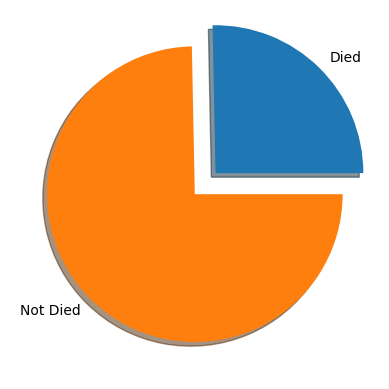

In [ ]:
patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 0][data.DEATH_EVENT == 0]
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = [len_d_died,len_d_alive]
labels = ['Died', "Not Died"]
plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow=True)
plt.show()


<Axes: >

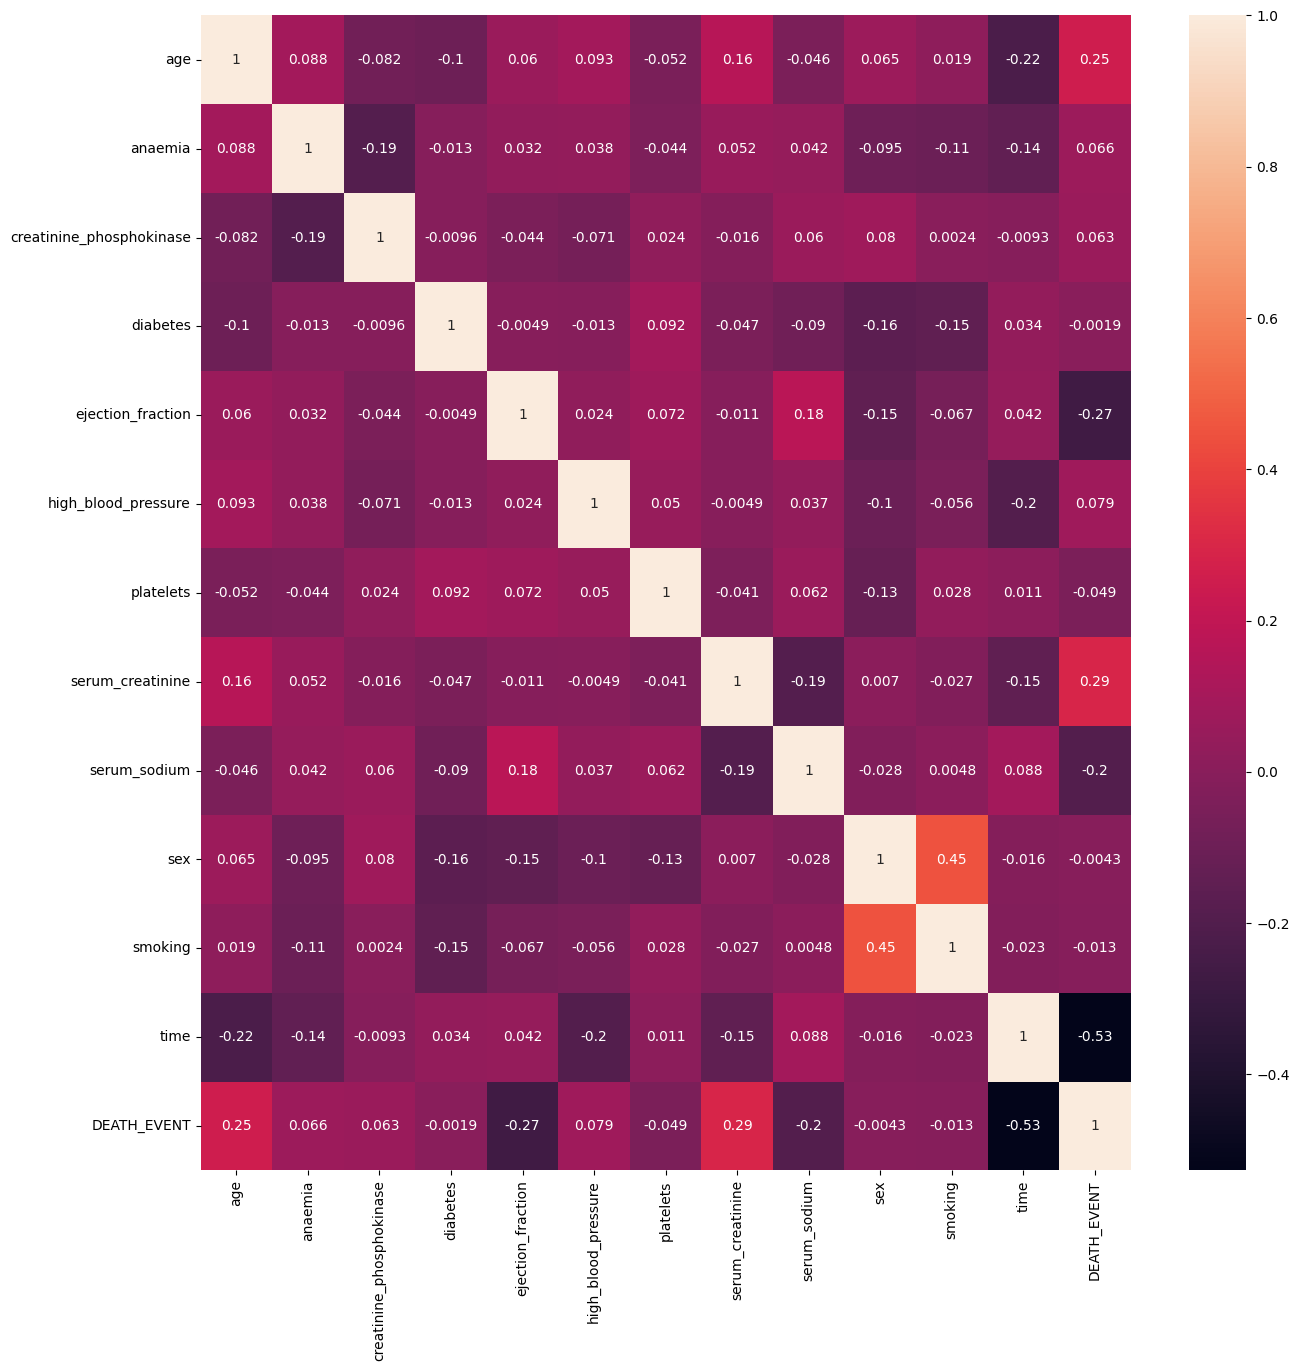

In [ ]:
corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr , annot=True)

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('DEATH_EVENT', axis=1)
y = data["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("Shape of the X_train", X_train.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (209, 12)
Shape of the y_train (209,)
Shape of the X_test (90, 12)
Shape of the y_test (90,)


In [ ]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)


    for i in range(m):

        feature_i_name = features[i]

        feature_i_data = X[feature_i_name]

        for j in range(i+1, m):

            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] =  feature_i_data * feature_j_data

    return X_int


x_train_mod = add_interactions(X_train)
x_test_mod  = add_interactions(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    '''
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred))
    print("Precision Score:- ", precision_score(y_test, y_pred))
    print("Recall Score:- ", recall_score(y_test, y_pred))
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

lr_clf_pred = lr_clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lr_clf.predict(X_test)
evaluating_model(y_test, y_pred)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.8235294117647058
Recall Score:-  0.5
Confusion Matrix:- 
 [[59  3]
 [14 14]]


**Logistic regression with StandardScaler**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pip.fit(X_train, y_train)

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test,y_pred1)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.7894736842105263
Recall Score:-  0.5357142857142857
Confusion Matrix:- 
 [[58  4]
 [13 15]]


**Grid Search CV**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svc = SVC(C = 10, gamma = 0.0001)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)
evaluating_model(y_test, y_pred2)

Accuracy Score:-  0.6777777777777778
Precision Score:-  0.4
Recall Score:-  0.07142857142857142
Confusion Matrix:- 
 [[59  3]
 [26  2]]


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))

    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.847
Test score: 0.756


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [ ]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')
ds_clf.fit(X_train, y_train)
pred4 = ds_clf.predict(X_test)
evaluating_model(y_test, pred4)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.72
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[55  7]
 [10 18]]
